In [1]:
!unzip '/content/Flowers-Dataset.zip'

unzip:  cannot find or open /content/Flowers-Dataset.zip, /content/Flowers-Dataset.zip.zip or /content/Flowers-Dataset.zip.ZIP.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
xtrain = train_datagen.flow_from_directory('/content/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

FileNotFoundError: ignored

In [ ]:
xtest = test_datagen.flow_from_directory('/content/flowers',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


#Create Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

#Convolution Layer

In [ ]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) 

#MaxPooling

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten

In [ ]:
model.add(Flatten())

#Dense Layer

In [ ]:
model.add(Dense(300,activation='relu')) #hiddenlayer 1
model.add(Dense(150,activation='relu')) #hiddenlayer 2

#Output

In [ ]:
model.add(Dense(5,activation='softmax')) 

#Compile the model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Train

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=100,
                    callbacks=callback,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
44/44 [==============================] - 44s 999ms/step - loss: 1.4457 - accuracy: 0.3966 - val_loss: 1.1630 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 2/100
44/44 [==============================] - 43s 984ms/step - loss: 1.0895 - accuracy: 0.5622 - val_loss: 1.0866 - val_accuracy: 0.5671 - lr: 0.0010
Epoch 3/100
44/44 [==============================] - 43s 984ms/step - loss: 1.0103 - accuracy: 0.6115 - val_loss: 0.9593 - val_accuracy: 0.6352 - lr: 0.0010
Epoch 4/100
44/44 [==============================] - 45s 1s/step - loss: 0.9328 - accuracy: 0.6465 - val_loss: 1.0083 - val_accuracy: 0.6261 - lr: 0.0010
Epoch 5/100
44/44 [==============================] - 44s 1s/step - loss: 0.8719 - accuracy: 0.6720 - val_loss: 0.7892 - val_accuracy: 0.7042 - lr: 0.0010
Epoch 6/100
44/44 [==============================] - 47s 1s/step - loss: 0.8335 - accuracy: 0.6792 - val_loss: 0.8034 - val_accuracy: 0.6924 - lr: 0.0010
Epoch 7/100
44/44 [==============================] - 44s 1s/step - 

#Saving

In [ ]:
model.save('Flowers.h5')

#Testing the model

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/flowers/sunflower/10386503264_e05387e1f7_m.jpg',target_size=(64,64))

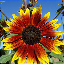

In [ ]:
img

#Array Conversion

In [ ]:
x = image.img_to_array(img)
x

array([[[ 37.,  93., 242.],
        [ 45., 103., 210.],
        [ 36., 104., 205.],
        ...,
        [ 51., 115., 223.],
        [131.,  60.,  16.],
        [ 68., 120., 242.]],

       [[ 83., 137., 183.],
        [110., 142., 131.],
        [127., 151., 119.],
        ...,
        [ 68., 118., 191.],
        [ 53.,  23.,  13.],
        [ 54., 127., 221.]],

       [[ 80., 114.,  77.],
        [ 86., 110.,  58.],
        [ 81., 122., 154.],
        ...,
        [ 67., 120., 188.],
        [ 53.,  99., 149.],
        [ 63., 129., 223.]],

       ...,

       [[120., 157., 116.],
        [138., 164., 116.],
        [125., 155., 103.],
        ...,
        [121., 153.,  86.],
        [ 20.,  30.,   5.],
        [124., 136.,  96.]],

       [[132., 156., 120.],
        [161., 190., 132.],
        [115., 139.,  89.],
        ...,
        [113., 137.,  75.],
        [108., 133.,  75.],
        [112., 141.,  75.]],

       [[  0.,  10.,   6.],
        [ 58.,  72.,  47.],
        [ 53.,  

Expanding dimensions

In [ ]:
x = np.expand_dims(x,axis=0)
x

array([[[[ 37.,  93., 242.],
         [ 45., 103., 210.],
         [ 36., 104., 205.],
         ...,
         [ 51., 115., 223.],
         [131.,  60.,  16.],
         [ 68., 120., 242.]],

        [[ 83., 137., 183.],
         [110., 142., 131.],
         [127., 151., 119.],
         ...,
         [ 68., 118., 191.],
         [ 53.,  23.,  13.],
         [ 54., 127., 221.]],

        [[ 80., 114.,  77.],
         [ 86., 110.,  58.],
         [ 81., 122., 154.],
         ...,
         [ 67., 120., 188.],
         [ 53.,  99., 149.],
         [ 63., 129., 223.]],

        ...,

        [[120., 157., 116.],
         [138., 164., 116.],
         [125., 155., 103.],
         ...,
         [121., 153.,  86.],
         [ 20.,  30.,   5.],
         [124., 136.,  96.]],

        [[132., 156., 120.],
         [161., 190., 132.],
         [115., 139.,  89.],
         ...,
         [113., 137.,  75.],
         [108., 133.,  75.],
         [112., 141.,  75.]],

        [[  0.,  10.,   6.],
       

#Prediction

In [ ]:
model.predict(x)

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'

In [ ]:
img = image.load_img('/content/flowers/daisy/10466558316_a7198b87e2.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'daisy'